In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load the Dataset
# Replace 'student_scores.csv' with your file's path if different
data = pd.read_csv('student_scores.csv')
data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Display the first few rows of the dataset
print(data.head())
print(data.info())




   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


In [4]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())


Missing values:
 Hours     0
Scores    0
dtype: int64


In [5]:
# Data Preprocessing 
# Assuming the dataset has two columns: 'Hours' and 'Scores'
# Rename columns if they are not labeled this way
data.columns = ['Hours', 'Scores']



In [6]:
# Split the Data
X = data[['Hours']]  # Predictor variable (Hours studied)
y = data['Scores']   # Target variable (Scores)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Build and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

Mean Squared Error: 18.94
R-squared Score: 0.97


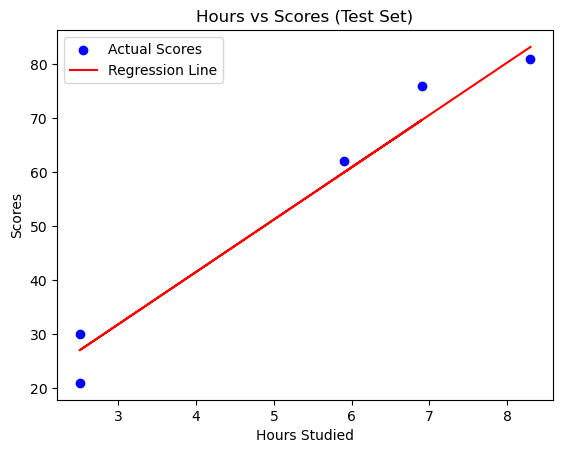

In [8]:
# Evaluate the Model
# Predict scores for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# 7. Visualize the Results
# Scatter plot of actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Hours vs Scores (Test Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show()



In [9]:
# Predict New Data (optional)
# Example: Predict score for a student who studies 8 hours
hours = np.array([[8]])  # Input must be 2D
predicted_score = model.predict(hours)
print(f"Predicted Score for 8 hours of study: {predicted_score[0]:.2f}")



Predicted Score for 8 hours of study: 80.28


C:\Users\user\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# Save the Model (optional)
import joblib
joblib.dump(model, 'student_score_model.pkl')
print("Model saved!")


Model saved!
